In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, SimpleRNN
import seaborn as sns
from numpy import array

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [2]:
data = pd.read_csv(r"C:\Users\bharg\OneDrive\Desktop\PS - 1\blizzard_final_complete_hourly_data_2016_2019.csv")
data = pd.DataFrame(data)
data['date'] = pd.to_datetime(data['date'])

X = data[['tempr', 'ap', 'ws', 'rh']]
y = data['blizzard']

In [3]:
train = int(len(X)*0.8)
X_train = X[:train]
y_train = y[:train]
X_test = X[train:]
y_test = y[train:]




ap_test = data['ap'][train:]
ap_test = array(ap_test)
speed_test = data['ws'][train:]
speed_test = array(speed_test)

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:
# Reshape the input data to match the expected input shape of the RNN
# The expected shape is (number_of_samples, time_steps, number_of_features)
time_steps = 1  # Assuming each input sample is considered independently
number_of_features = 4  # Assuming you have 4 input variables

X_train = np.reshape(X_train, (X_train.shape[0], time_steps, number_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, number_of_features))


In [6]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(time_steps, number_of_features)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1118/1118 [==============================] - 5s 3ms/step - loss: 0.1494 - accuracy: 0.9782
Epoch 2/5
1118/1118 [==============================] - 4s 3ms/step - loss: 0.1145 - accuracy: 0.9788
Epoch 3/5
1118/1118 [==============================] - 3s 2ms/step - loss: 0.1178 - accuracy: 0.9798
Epoch 4/5
1118/1118 [==============================] - 2s 2ms/step - loss: 0.1001 - accuracy: 0.9808
Epoch 5/5
1118/1118 [==============================] - 2s 2ms/step - loss: 0.1211 - accuracy: 0.9797


In [8]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred

280/280 [==============================] - 1s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [9]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score



# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[8598   65]
 [  89  186]]
F1 Score: 0.7072243346007604
Accuracy: 0.9827701946744238


positive:  275  negative:  8663  tp:  186  tn:  8598  fn:  89  fp:  65
0.7072243346007605


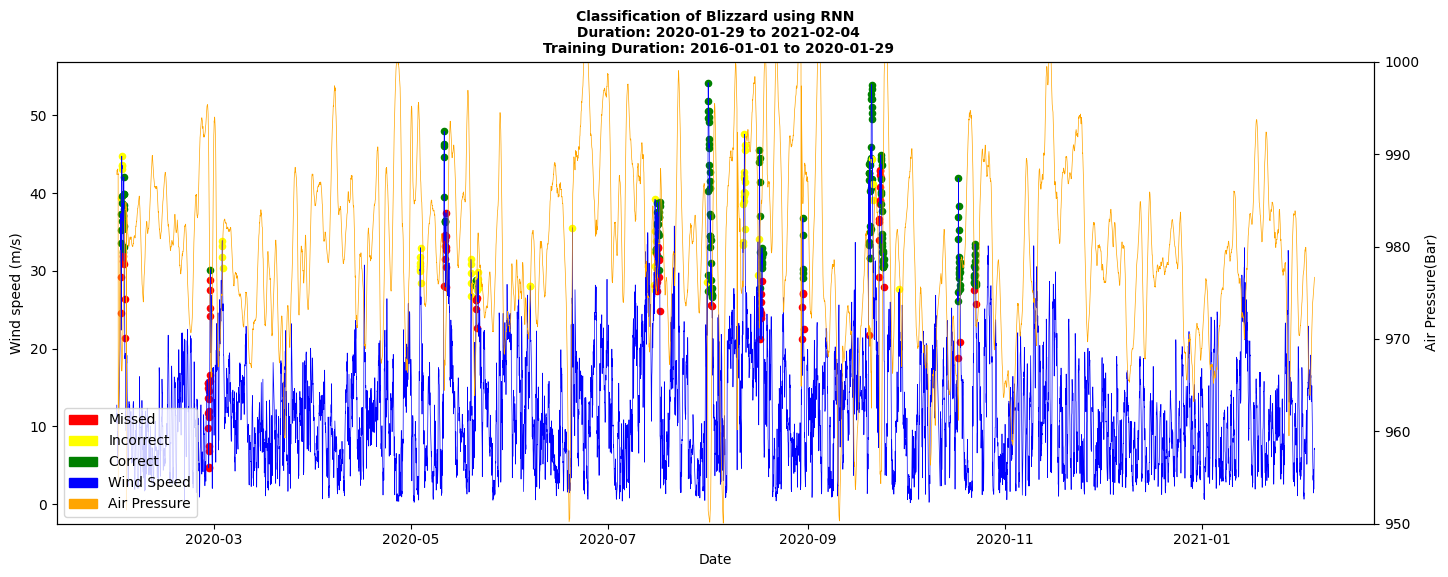

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

yspeed_test = data['ws'][35750:]
yspeed_test = array(yspeed_test)

res=[]
outk = []
for i in range(len(y_pred)):
    res.append(y_pred[i])
res = array(res)
res = (res-min(res))/(max(res)-min(res))
tn = fn = tp = fp = pos = neg = 0
for i in range(len(res)):
    if res[i] > 0.5:
        res[i] = 1
    else:
        res[i] = 0

for i in range(len(res)):
    if y_test[i] == 0:
        neg += 1
        if res[i] == 0:
            outk.append(0)
            tn += 1
        else:
            outk.append(2)
            fp += 1
    else:
        pos += 1
        if res[i] == 1:
            outk.append(1)
            tp += 1
        else:
            outk.append(3)
            fn += 1
            
print("positive: ", pos, " negative: ", neg, " tp: ", tp, " tn: ", tn, " fn: ", fn, " fp: ", fp)
print(2*tp/(2*tp +fp+fn))



plt.figure(figsize=(17,6))
ax1 = plt.gca()  # Get current axis
ax2 = ax1.twinx()  # Create a twin axis

# Plot wind speed on the left y-axis
ax1.plot(data['date'][-8904:], data['ws'][-8904:], linewidth=0.5, color='blue')
ax1.set_ylabel('Wind speed (m/s)')

# Plot adjusted air pressure on the right y-axis
ax2.plot(data['date'][-8904:], (data['ap'][-8904:]), linewidth=0.5, color='orange')
ax2.set_ylabel('Air Pressure(Bar)')

# Set the scale of the right y-axis
ax2.set_ylim(950, 1000)
plt.xlabel("Date", fontweight = 'bold' )

ax1.set_xlabel('Date')
plt.title("Classification of Blizzard using RNN\n Duration: 2020-01-29 to 2021-02-04\n Training Duration: 2016-01-01 to 2020-01-29", fontweight = 'bold', fontsize = 10)
for i in range(len(speed_test)):
    if outk[i] == 1:
        ax1.scatter(data['date'][35750+i], speed_test[i], s=20 ,c='green')
    elif outk[i] == 2:
        ax1.scatter(data['date'][35750+i], speed_test[i],s=20 ,c='yellow')
    elif outk[i] == 3:
        ax1.scatter(data['date'][35750+i], speed_test[i], s=20,c='red')


pop_a = mpatches.Patch(color='red', label='Missed')
pop_b = mpatches.Patch(color='yellow', label='Incorrect')
pop_c = mpatches.Patch(color='green', label='Correct')
pop_d = mpatches.Patch(color='blue', label='Wind Speed')
pop_e = mpatches.Patch(color = 'orange', label = 'Air Pressure')
plt.legend(handles=[pop_a,pop_b, pop_c, pop_d,pop_e])
plt.savefig("Blizzard_RNN.png", format='png', dpi=800)

plt.show()
